# Week 15, Lecture 02 CodeAlong: Hypothesis Testing

- xx/xx/xx

Today, we will be analyzing data from the Crowdfunding website Kiva and answering several questions about the data.

- Use your hypothesis testing skills and the  ["Guide: Choosing the Right Hypothesis Test"](https://login.codingdojo.com/m/376/12533/88117) lesson from the LP.
    

- Kiva Crowdfunding Data Set:
    -  https://www.kaggle.com/datasets/kiva/data-science-for-good-kiva-crowdfunding 



### Questions to Answer

- Q1: Do all-male teams get more funding vs teams that include at least 1 female?
- Q2: Do different sectors get more/less funding?

# Hypothesis Testing

In [1]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy
scipy.__version__

'1.8.1'

In [2]:
## load the kiva_loans.csv. display info and head
df = pd.read_csv('Data/kiva_loans.csv.gz')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666984 entries, 0 to 666983
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  666984 non-null  int64  
 1   funded_amount       666984 non-null  float64
 2   loan_amount         666984 non-null  float64
 3   activity            666984 non-null  object 
 4   sector              666984 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        666976 non-null  object 
 7   country             666984 non-null  object 
 8   region              614405 non-null  object 
 9   currency            666984 non-null  object 
 10  partner_id          653896 non-null  float64
 11  posted_time         666984 non-null  object 
 12  disbursed_time      665003 non-null  object 
 13  funded_time         619335 non-null  object 
 14  term_in_months      666984 non-null  float64
 15  lender_count        666984 non-nul

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [3]:
## Drop null values from related columns
df = df.dropna(subset=['borrower_genders','funded_amount'])

# Setting the id as the index
df = df.set_index('id')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666984 entries, 653051 to 1340339
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   funded_amount       666984 non-null  float64
 1   loan_amount         666984 non-null  float64
 2   activity            666984 non-null  object 
 3   sector              666984 non-null  object 
 4   use                 666973 non-null  object 
 5   country_code        666976 non-null  object 
 6   country             666984 non-null  object 
 7   region              614405 non-null  object 
 8   currency            666984 non-null  object 
 9   partner_id          653896 non-null  float64
 10  posted_time         666984 non-null  object 
 11  disbursed_time      665003 non-null  object 
 12  funded_time         619335 non-null  object 
 13  term_in_months      666984 non-null  float64
 14  lender_count        666984 non-null  int64  
 15  tags                496877 n

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
id,,,,,,,,,,,,,,,,,,,
653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


# Q1:  Do all-male teams get more funding vs teams that include at least 1 female?

## 1. State the Hypothesis & Null Hypothesis 

- $H_0$ (Null Hypothesis):All the funding amount is same between teams with male/female
- $H_A$ (Alternative Hypothesis):  There is a significant difference in funding based on gender

## 2. Determine the correct test to perform.
- Type of Data? Numeric
- How many groups/samples? two (all males vs at least 1 female)
- Therefore, which test is appropriate? 2 sample T test

### Visualize and separate data for hypothesis

- What column is our target? Funding amount
- What column determines our groups? borrower gender

In [4]:
## check the col that contains the gender

df['borrower_genders'].value_counts()


female                                                                                                                                                                                                                          426502
male                                                                                                                                                                                                                            134710
female, female                                                                                                                                                                                                                   12164
female, female, female                                                                                                                                                                                                           11676
female, female, female, female                                              

In [5]:
## check the col that contains info on gender


In [6]:
## create a column that easily separates our groups
df['has_female'] = df['borrower_genders'].str.contains('female')
df['has_female'].value_counts()

True     528461
False    138523
Name: has_female, dtype: int64

In [7]:
## save list of columns needed for each group
needed_cols = ['funded_amount','has_female']
df[needed_cols]

,funded_amount,has_female
id,,
653051,300.0,True
653053,575.0,True
653068,150.0,True
653063,200.0,True
653084,400.0,True
...,...,...
1340318,0.0,True
1340323,0.0,True
1340316,25.0,True


In [8]:
## save male team in separate variable
male_df = df.loc[df['has_female']==False,needed_cols]
male_df

,funded_amount,has_female
id,,
653418,450.0,False
653170,3175.0,False
653432,550.0,False
1080150,125.0,False
653410,1075.0,False
...,...,...
1339703,0.0,False
1339831,50.0,False
1339701,125.0,False


In [9]:
## save female team in separate variables
female_df = df.loc[ df['has_female']==True, needed_cols]
female_df

,funded_amount,has_female
id,,
653051,300.0,True
653053,575.0,True
653068,150.0,True
653063,200.0,True
653084,400.0,True
...,...,...
1340318,0.0,True
1340323,0.0,True
1340316,25.0,True


In [10]:
## Make a df just for visualization by concat the groups 
plot_df =  pd.concat([male_df,female_df])
plot_df

,funded_amount,has_female
id,,
653418,450.0,False
653170,3175.0,False
653432,550.0,False
1080150,125.0,False
653410,1075.0,False
...,...,...
1340318,0.0,True
1340323,0.0,True
1340316,25.0,True


<AxesSubplot:xlabel='has_female', ylabel='funded_amount'>

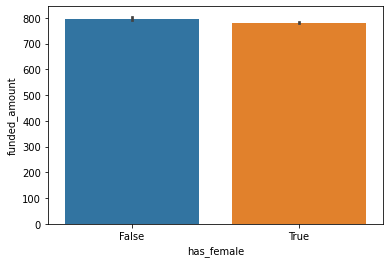

In [11]:

## visualize the group means
sns.barplot(data=df,x='has_female',y='funded_amount')

## 3. Testing Assumptions

- No significant outliers
- Normality
- Equal Variance

### Checking Assumption of No Sig. Outliers

In [12]:
## Saving JUST the numeric col as final group variables
male_group = male_df['funded_amount']
female_group = female_df['funded_amount']
male_group

id
653418      450.0
653170     3175.0
653432      550.0
1080150     125.0
653410     1075.0
            ...  
1339703       0.0
1339831      50.0
1339701     125.0
1339668     175.0
1339743       0.0
Name: funded_amount, Length: 138523, dtype: float64

In [13]:
## Check female group for outliers
female_outliers = np.abs(stats.zscore(female_group))>3

## how many outliers?
female_outliers.value_counts()

False    515117
True      13344
Name: funded_amount, dtype: int64

In [14]:
## remove outliers from female_group
female_group = female_group[~female_outliers]

In [16]:
## Check female group for outliers
male_outliers = np.abs(stats.zscore(male_group))>3

## how many outliers?
male_outliers.value_counts()

False    136771
True       1752
Name: funded_amount, dtype: int64

In [17]:
## remove outliers from female_group
male_group = male_group[~male_outliers]
male_group

id
653418      450.0
653170     3175.0
653432      550.0
1080150     125.0
653410     1075.0
            ...  
1339703       0.0
1339831      50.0
1339701     125.0
1339668     175.0
1339743       0.0
Name: funded_amount, Length: 136771, dtype: float64

In [18]:
len(female_group),len(male_group)

(515117, 136771)

### Test for Normality

In [17]:

## Check female group for normality
result = stats.normaltest(female_group)
result

NormaltestResult(statistic=254918.2167882442, pvalue=0.0)

In [18]:
## Check n for female group
len(female_group)

515117

In [19]:
## Check male group for normality
result = stats.normaltest(male_group)
result

NormaltestResult(statistic=56405.00961762786, pvalue=0.0)

In [20]:
## Check n for male group
len(male_group)

136771

- Did we meet the assumption?

we did not met assumption of normality but sample size is big enough to pass the test

![png](Data/question.png)

### Test for Equal Variances

In [21]:
## Use Levene's test for equal variance
result = stats.levene(female_group,male_group)
result
#result.pvalue <0.5

LeveneResult(statistic=59.19804480808947, pvalue=1.427735962793746e-14)

In [22]:

## Use an if-else to help interpret the p-value
if result.pvalue <.05:
    print('The groups DO NOT have equal variance')
else:
    print('The groups DO have equal variance')

The groups DO NOT have equal variance


- Did we meet the assumptions?

## Final Hypothesis Test

- Did we meet our test's assumptions? 
    - If not, what is the alternative test?

In [23]:
## run final hypothess test
result = stats.ttest_ind(female_group,male_group,equal_var=False)
result

Ttest_indResult(statistic=-29.74961820258417, pvalue=4.102857297759938e-194)

In [24]:
print(result.pvalue<.000001)

True


In [25]:
## make a plot or calcualte group means to know which group had more/less.
female_group.mean()

652.9337897992107

In [26]:
male_group.mean()

709.4942275774836

In [58]:
## concatenate the two dataframes for visualziation.
plot_df = pd.concat([male_df.loc[~male_outliers], 
                     female_df.loc[~female_outliers]], axis=0)
plot_df

,funded_amount,has_female
id,,
653418,450.0,False
653170,3175.0,False
653432,550.0,False
1080150,125.0,False
653410,1075.0,False
...,...,...
1340318,0.0,True
1340323,0.0,True
1340316,25.0,True


<AxesSubplot:xlabel='has_female', ylabel='funded_amount'>

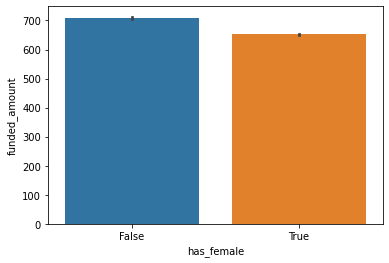

In [59]:
## visualize the group means
sns.barplot(data=plot_df,x='has_female',y='funded_amount')

- Final Conclusion:
    - We had p value <0.05 for the test. So, we reject the null hypothesis and support the alternate hypothesis. Teams with at least one female receive smaller funded amount than all males team

# Q2: Do different sectors get more/less funding?

## 1. State the Hypothesis & Null Hypothesis 

- $H_0$ (Null Hypothesis): There is no difference between funded amounts for different sectors.
- $H_A$ (Alternative Hypothesis):There is a significant difference between funded amounts for different sectors.

## 2. Determine the correct test to perform.

- Type of Data? Numerical Data
- How many groups/samples? more than 2 (15)
- Therefore, which test is appropriate?ANOVA

In [27]:
## how many sectors?
df['sector'].value_counts()

Agriculture       179224
Food              135749
Retail            123758
Services           44699
Personal Use       36247
Housing            33571
Clothing           32480
Education          30837
Transportation     15455
Arts               11994
Health              9172
Construction        6194
Manufacturing       6158
Entertainment        820
Wholesale            626
Name: sector, dtype: int64

### Visualize and separate data for hypothesis

- What column is our target?
- What column determines our groups?

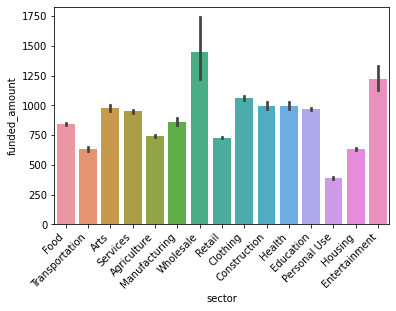

In [28]:
## barplot
ax = sns.barplot(data=df,x='sector',y='funded_amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [29]:
needed_cols = ['sector','funded_amount']
df[needed_cols]

,sector,funded_amount
id,,
653051,Food,300.0
653053,Transportation,575.0
653068,Transportation,150.0
653063,Arts,200.0
653084,Food,400.0
...,...,...
1340318,Agriculture,0.0
1340323,Agriculture,0.0
1340316,Agriculture,25.0


In [30]:
# create keys 
df['sector'].unique()

array(['Food', 'Transportation', 'Arts', 'Services', 'Agriculture',
       'Manufacturing', 'Wholesale', 'Retail', 'Clothing', 'Construction',
       'Health', 'Education', 'Personal Use', 'Housing', 'Entertainment'],
      dtype=object)

In [31]:
df['sector']

id
653051               Food
653053     Transportation
653068     Transportation
653063               Arts
653084               Food
                ...      
1340318       Agriculture
1340323       Agriculture
1340316       Agriculture
1340338       Agriculture
1340339       Agriculture
Name: sector, Length: 666984, dtype: object

In [68]:
tempgroups ={}
a=0
for s in df['sector'].unique():
    a=a+1
    tempgroups[s] = a
    #temp1 = df.loc[df['sector']== sector, 'funded_amount']
tempgroups

{'Food': 1,
 'Transportation': 2,
 'Arts': 3,
 'Services': 4,
 'Agriculture': 5,
 'Manufacturing': 6,
 'Wholesale': 7,
 'Retail': 8,
 'Clothing': 9,
 'Construction': 10,
 'Health': 11,
 'Education': 12,
 'Personal Use': 13,
 'Housing': 14,
 'Entertainment': 15}

In [76]:
for s in df['sector'].unique():
    
    print(f"{s} - {df.loc[df['sector']== s, 'funded_amount']}")

Food - id
653051      300.0
653084      400.0
653048      625.0
653065      250.0
653055      350.0
            ...  
1338707    2650.0
1338799      50.0
1338859       0.0
1338682    3525.0
1339743       0.0
Name: funded_amount, Length: 135749, dtype: float64
Transportation - id
653053     575.0
653068     150.0
653060     200.0
653054     300.0
653056     475.0
           ...  
1338426      0.0
1338575      0.0
1338405      0.0
1338541      0.0
1338819    250.0
Name: funded_amount, Length: 15455, dtype: float64
Arts - id
653063      200.0
653079      350.0
653124      425.0
653407      275.0
653783     2550.0
            ...  
1338545     150.0
1338643    1525.0
1338581       0.0
1338516     100.0
1338653     500.0
Name: funded_amount, Length: 11994, dtype: float64
Services - id
1080148    250.0
653078     400.0
653052     875.0
653066     250.0
653080     475.0
           ...  
1339259      0.0
1338816     50.0
1339073      0.0
1339713    175.0
1339765      0.0
Name: funded_amount, L

In [77]:
## Create a dictionary with each group as key and funded_amount as values
groups ={}

for sector in df['sector'].unique():
    temp = df.loc[df['sector']== sector, 'funded_amount']
    groups[sector] = temp

groups.keys()

dict_keys(['Food', 'Transportation', 'Arts', 'Services', 'Agriculture', 'Manufacturing', 'Wholesale', 'Retail', 'Clothing', 'Construction', 'Health', 'Education', 'Personal Use', 'Housing', 'Entertainment'])

In [78]:
groups.items()

dict_items([('Food', id
653051      300.0
653084      400.0
653048      625.0
653065      250.0
653055      350.0
            ...  
1338707    2650.0
1338799      50.0
1338859       0.0
1338682    3525.0
1339743       0.0
Name: funded_amount, Length: 135749, dtype: float64), ('Transportation', id
653053     575.0
653068     150.0
653060     200.0
653054     300.0
653056     475.0
           ...  
1338426      0.0
1338575      0.0
1338405      0.0
1338541      0.0
1338819    250.0
Name: funded_amount, Length: 15455, dtype: float64), ('Arts', id
653063      200.0
653079      350.0
653124      425.0
653407      275.0
653783     2550.0
            ...  
1338545     150.0
1338643    1525.0
1338581       0.0
1338516     100.0
1338653     500.0
Name: funded_amount, Length: 11994, dtype: float64), ('Services', id
1080148    250.0
653078     400.0
653052     875.0
653066     250.0
653080     475.0
           ...  
1339259      0.0
1338816     50.0
1339073      0.0
1339713    175.0
1339765      

In [79]:
## check one of the sectors in the dict
groups['Personal Use']

id
653432      550.0
653188     1000.0
653191     1500.0
653186     1000.0
653215      450.0
            ...  
1336305       0.0
1336340       0.0
1336479       0.0
1336868       0.0
1337940       0.0
Name: funded_amount, Length: 36247, dtype: float64

## 3. Testing Assumptions

- No significant outliers
- Normality
- Equal Variance

### Checking Assumption of No Sig. Outliers

In [35]:
# check for one sector outlier

temp = np.abs(stats.zscore(groups['Personal Use'])) > 3
temp.value_counts()

False    35684
True       563
Name: funded_amount, dtype: int64

In [36]:
## Remove the outiers from one sector 
temp = groups['Personal Use'].loc[~temp]
#groups[sector] = data
len(temp)

35684

In [37]:
## Loop through groups dict
for sector, data in groups.items():

    ## determine if there are any outliers
    outliers = np.abs(stats.zscore(data)) > 3
    
    ## print a statement about how many outliers for which group name
    print(f"There were {outliers.sum()} outliers in the {sector} group.")

    ## Remove the outiers from data and overwrite the sector data in the dict
    data = data.loc[~outliers]
    groups[sector] = data


There were 3994 outliers in the Food group.
There were 231 outliers in the Transportation group.
There were 273 outliers in the Arts group.
There were 1253 outliers in the Services group.
There were 2478 outliers in the Agriculture group.
There were 95 outliers in the Manufacturing group.
There were 4 outliers in the Wholesale group.
There were 3007 outliers in the Retail group.
There were 857 outliers in the Clothing group.
There were 151 outliers in the Construction group.
There were 109 outliers in the Health group.
There were 473 outliers in the Education group.
There were 563 outliers in the Personal Use group.
There were 590 outliers in the Housing group.
There were 17 outliers in the Entertainment group.


### Test for Normality

In [38]:
# you can use stats.normaltest for each group separately or use the loop
stats.normaltest(groups['Personal Use']).pvalue <0.5



True

In [39]:
## Running normal test on each group and confirming there are >20 in each group

## Save a list with an inner list of column names
norm_results = [['group','n','pval','sig?']]


## loop through group dict
for sector, data in groups.items():
    ## calculate normaltest results
    stat, p = stats.normaltest(data)
    
    ## Append the right info into norm_resutls (as a list)
    norm_results.append([sector,len(data), p, p<.05])
    
    
## Make norm_results a dataframe (first row is columns, everything else data)
normal_results = pd.DataFrame(norm_results[1:], columns = norm_results[0])
normal_results


,group,n,pval,sig?
0,Food,131755,0.000000e+00,True
1,Transportation,15224,0.000000e+00,True
2,Arts,11721,0.000000e+00,True
3,Services,43446,0.000000e+00,True
4,Agriculture,176746,0.000000e+00,True
5,Manufacturing,6063,0.000000e+00,True
6,Wholesale,622,6.931789e-92,True
7,Retail,120751,0.000000e+00,True
8,Clothing,31623,0.000000e+00,True
9,Construction,6043,0.000000e+00,True


- Did we meet the assumption?
-- we failed the assumption of normality , but our groups are large enough that we can safely disregard/ignore the assumption of normality

### Test for Equal Variances

In [40]:
#stats.levene()test

In [41]:
## DEMO: using the * operator to unpack lists
a_list = ['a','b','c']
b_list = [1,2,3]
new_list= [*a_list, *b_list]
new_list

['a', 'b', 'c', 1, 2, 3]

In [42]:
## Use Levene's test for equal variance
result = stats.levene(*groups.values())
print(result)

LeveneResult(statistic=941.8381341090084, pvalue=0.0)


In [43]:

## Use an if-else to help interpret the p-value
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


- Did we meet the assumption?
- We met the assumption of normality but did NOT meet the assumption of equal variance. 
- We wanted to run an ANOVA test but will need to use a Kurskal-Wallis test instead.

## Final Hypothesis Test

- Did we meet our test's assumptions? 
    - If not, what is the alternative test?

In [44]:
## Running Krukal Test for Original Hypothesis
result = stats.kruskal(*groups.values())
print(result)
result.pvalue<.05

KruskalResult(statistic=36348.9897834356, pvalue=0.0)


True

- Interpret Results. Did we have a significant result?
- Is a post-hoc test needed?

- Our Kruskal Wallis test returned a p-value MUCH less than .05. We reject the null hypothesis and conclude that there is a significant difference between funded amounts for different Sectors. 

- We don't know WHICH sectors are different yet, though.... 
    - For that we will run a Post-Hoc Multiple Comparison Test to get a p-value for every possible combination of 2 groups. 

### Post-Hoc Multiple Comparison Test

In [45]:
## Post Hoc
from statsmodels.stats.multicomp import pairwise_tukeyhsd

- Tukey's test requires a list of group names and a list of measured values. 
- Easiest way to produce and visualize this is to make our groups dict into a dataframe 

#### Testing Converting our Dictionary to a DataFrame

In [46]:
## slice a test sector
temp = groups['Personal Use']
temp

id
653432      550.0
653188     1000.0
653191     1500.0
653186     1000.0
653215      450.0
            ...  
1336305       0.0
1336340       0.0
1336479       0.0
1336868       0.0
1337940       0.0
Name: funded_amount, Length: 35684, dtype: float64

In [47]:
## test making a dataframe from the test sector and filling in the sector name
pd.DataFrame({'Funded Amount':temp, 'Sector':'Personal Use'})

,Funded Amount,Sector
id,,
653432,550.0,Personal Use
653188,1000.0,Personal Use
653191,1500.0,Personal Use
653186,1000.0,Personal Use
653215,450.0,Personal Use
...,...,...
1336305,0.0,Personal Use
1336340,0.0,Personal Use
1336479,0.0,Personal Use


#### Preparing the new dataframe for Tukey's test in a looop

In [48]:
## make a list for saving the dataframes to
tukeys_dfs = []

## Loop through groups dict's items
for sector, temp in groups.items():
    
    ## make a temp_df with the data and the sector name
    temp_df = pd.DataFrame({'Funded Amount':temp, 'Sector':sector})
    
    ## append to tukeys_dfs
    tukeys_dfs.append(temp_df)
    
## concatenate them into 1 dataframe    
tukeys_data = pd.concat(tukeys_dfs)
tukeys_data

,Funded Amount,Sector
id,,
653051,300.0,Food
653084,400.0,Food
653048,625.0,Food
653065,250.0,Food
653055,350.0,Food
...,...,...
1325258,1400.0,Entertainment
1326378,300.0,Entertainment
1331821,350.0,Entertainment


In [49]:
## save the values as kg_lost and the labels to the Diet
values = tukeys_data['Funded Amount']
labels = tukeys_data['Sector']

## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Agriculture,Arts,165.1053,0.0,143.2289,186.9817,True
Agriculture,Clothing,235.2757,0.0,221.2716,249.2798,True
Agriculture,Construction,177.9816,0.0,147.9769,207.9863,True
Agriculture,Education,213.7211,0.0,199.4728,227.9693,True
Agriculture,Entertainment,404.3165,0.0,323.194,485.439,True
Agriculture,Food,14.7386,0.0,6.3906,23.0867,True
Agriculture,Health,236.167,0.0,211.4647,260.8693,True
Agriculture,Housing,-87.0379,0.0,-100.7953,-73.2806,True
Agriculture,Manufacturing,96.7218,0.0,66.765,126.6786,True
Agriculture,Personal Use,-327.2873,0.0,-340.5983,-313.9763,True


In [50]:
## optional -slicing out dataframe from results
summary = tukeys_results.summary()
tukeys_df = pd.DataFrame(summary.data[1:], columns=summary.data[0])
tukeys_df

,group1,group2,meandiff,p-adj,lower,upper,reject
0,Agriculture,Arts,165.1053,0.0,143.2289,186.9817,True
1,Agriculture,Clothing,235.2757,0.0,221.2716,249.2798,True
2,Agriculture,Construction,177.9816,0.0,147.9769,207.9863,True
3,Agriculture,Education,213.7211,0.0,199.4728,227.9693,True
4,Agriculture,Entertainment,404.3165,0.0,323.1940,485.4390,True
...,...,...,...,...,...,...,...
100,Retail,Transportation,-36.3701,0.0,-56.0959,-16.6443,True
101,Retail,Wholesale,629.3854,0.0,537.1845,721.5863,True
102,Services,Transportation,-224.1958,0.0,-245.7973,-202.5943,True
103,Services,Wholesale,441.5597,0.0,348.9394,534.1800,True


In [51]:
pd.set_option('display.max_rows',120)
tukeys_df

,group1,group2,meandiff,p-adj,lower,upper,reject
0,Agriculture,Arts,165.1053,0.0000,143.2289,186.9817,True
1,Agriculture,Clothing,235.2757,0.0000,221.2716,249.2798,True
2,Agriculture,Construction,177.9816,0.0000,147.9769,207.9863,True
3,Agriculture,Education,213.7211,0.0000,199.4728,227.9693,True
4,Agriculture,Entertainment,404.3165,0.0000,323.1940,485.4390,True
5,Agriculture,Food,14.7386,0.0000,6.3906,23.0867,True
6,Agriculture,Health,236.1670,0.0000,211.4647,260.8693,True
7,Agriculture,Housing,-87.0379,0.0000,-100.7953,-73.2806,True
8,Agriculture,Manufacturing,96.7218,0.0000,66.7650,126.6786,True
9,Agriculture,Personal Use,-327.2873,0.0000,-340.5983,-313.9763,True


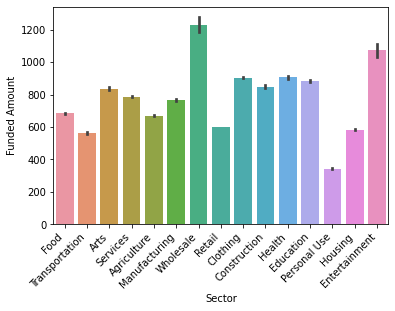

In [52]:
## make a barplot of final data to go with results
ax = sns.barplot(data=tukeys_data, x='Sector', y='Funded Amount', ci=68)
ax.set_xticklabels(ax.get_xticklabels(), rotation='45', ha='right');

In [53]:
## Not significantly different
tukeys_df[tukeys_df['reject'] ==False]

,group1,group2,meandiff,p-adj,lower,upper,reject
15,Arts,Construction,12.8763,0.9973,-23.4463,49.1989,False
31,Clothing,Health,0.8913,1.0000,-26.4362,28.2188,False
52,Education,Health,22.4459,0.2616,-5.0075,49.8993,False
88,Housing,Transportation,-20.1831,0.1361,-42.6563,2.2901,False
92,Manufacturing,Services,20.2530,0.6764,-11.1911,51.6970,False


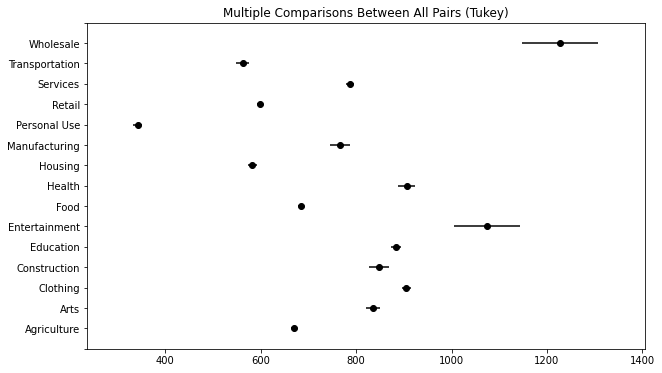

In [54]:
## also can use built-in plot tukeys_reuslts.plot_simultaneous
## also can use built-in plot tukeys_reuslts.plot_simultaneous
tukeys_results.plot_simultaneous();

- Final summary of group differences

- As we can see, there are MANY sectors that are significantly different from each other. Some highlights include that Wholesame and Entertainment have the highest average funded amounts and Personal use has the lowest.